## Necessary library for Data Analysis

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_curve,RocCurveDisplay
from scipy.stats import zscore
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
import pickle

## Uploading the Data Set

In [5]:
df=pd.read_csv('C:/Users/Admin/OneDrive/Desktop/EDUCATION/DATA SET_DATATRAINED/titanic_train (2).csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Analysis 1- Servived column shows binary type class, Pclass shows multiclass, sibsp shows multi class, perch shows multi class, 
#### 2- Sex, Embarked,Cabin has categorical type value
#### 3- Fare and age seems continous type value
#### 4- Name , Passenger id and ticket no is unique for each row

### Shape of data set

In [6]:
print('shape of data frame:',df.shape)
print('-----------------------'),
print('columns of data fram:::::::::',df.columns)
print('----------------------------------')
print('data types:',df.dtypes)
print('**********************************')

shape of data frame: (891, 12)
-----------------------
columns of data fram::::::::: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
----------------------------------
data types: PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
**********************************


## Comment:
#### Data set has 891 rows and 12 column, column names are::'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'|| There is no such disformation of data noticed.


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Cabin has more than 50% Null value and also a unique and catagorical data type which cannot be manipulated so we can drop the column.
### Age and embarked also have null values we need to do more analysis how to resolve it.

### CREATING A SEPERATE DATA FRAME

In [9]:
titanic=df.drop(columns='Cabin')

## HEAT MAP ANALYSIS

<AxesSubplot:>

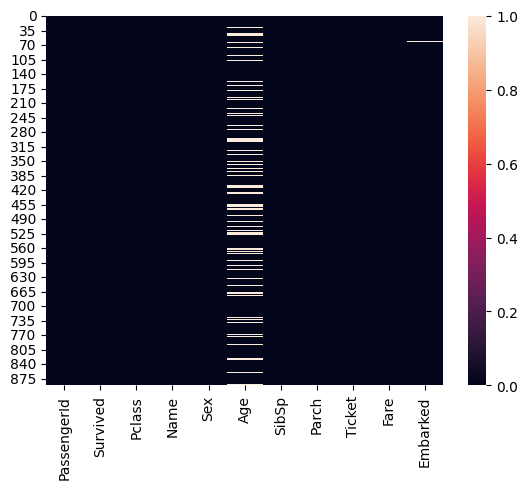

In [10]:
sns.heatmap(titanic.isnull(),linecolor='red')

###### Except Age all the data looks evenly formed. As age column has null value we can see a deformation in heatmap

## UNIQUE VALUE COUNT

In [11]:
for column in titanic.columns:
    un=titanic[column].unique() 
    print(column,un.size)   
   

PassengerId 891
Survived 2
Pclass 3
Name 891
Sex 2
Age 89
SibSp 7
Parch 7
Ticket 681
Fare 248
Embarked 4


### Passenger ID & Name has 891 unique value (so it can be says that is is unique for each row, so we can drop it if require.)

In [12]:
print(titanic['Name'].is_unique)
print(titanic['PassengerId'].is_unique)
titanic=titanic.drop(columns=['Name','PassengerId'])

True
True


In [13]:
## Repetation of a value in a perticualr column
for column in titanic.columns:
    count=titanic[column].value_counts()
    print(count) 

0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


#### Describe the Data set

In [14]:
titanic.describe() ## Describe the data set

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### As per df.describe()we can observe the below-
#### Survived, Pclass,Sibsp,parch,fare has no null value
#### Age has null value
#### There is a Skew ness present in 'Fare' and 'Age' column
#### Data type- 1- Servived column shows binary type class. Also Pclass, SibSp, Parch shows the multiclass type data but numarical one.
#### Embarked, Sex, Ticket column is not showing because these columns have categorical data.

###                                 Handling the Null value

In [15]:
## Dealing with Null value-
titanic['Age']=titanic['Age'].fillna(titanic['Age'].mean())
titanic['Sex']=titanic['Sex'].replace('male',0)
titanic['Sex']=titanic['Sex'].replace('female',1)
titanic.dropna(subset=['Embarked'],inplace=True)
titanic.reset_index()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,0,3,0,22.000000,1,0,A/5 21171,7.2500,S
1,1,1,1,1,38.000000,1,0,PC 17599,71.2833,C
2,2,1,3,1,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,3,1,1,1,35.000000,1,0,113803,53.1000,S
4,4,0,3,0,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
884,886,0,2,0,27.000000,0,0,211536,13.0000,S
885,887,1,1,1,19.000000,0,0,112053,30.0000,S
886,888,0,3,1,29.699118,1,2,W./C. 6607,23.4500,S
887,889,1,1,0,26.000000,0,0,111369,30.0000,C


## Survived,pclass,Sex,sibsp,parch,embarked,ticket these are categorical type data

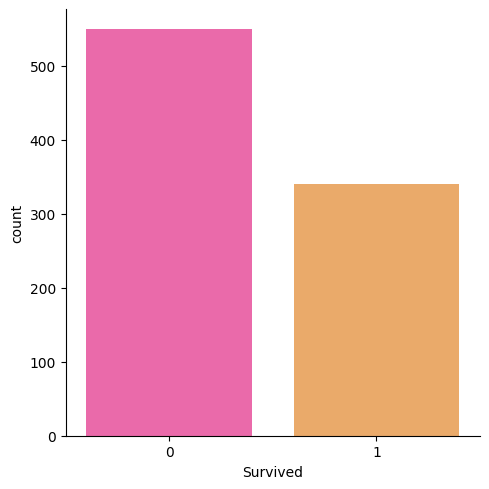

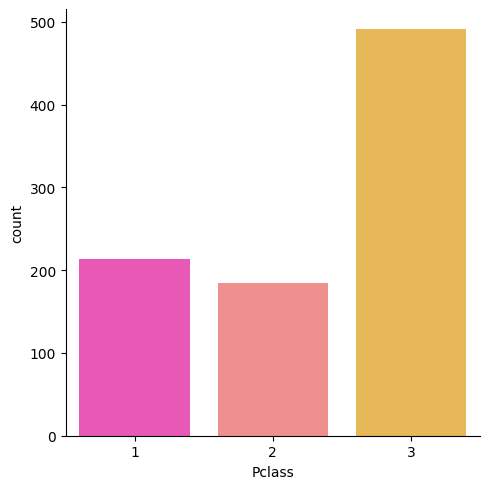

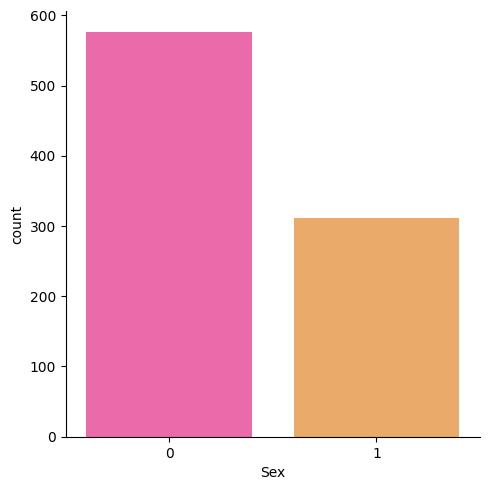

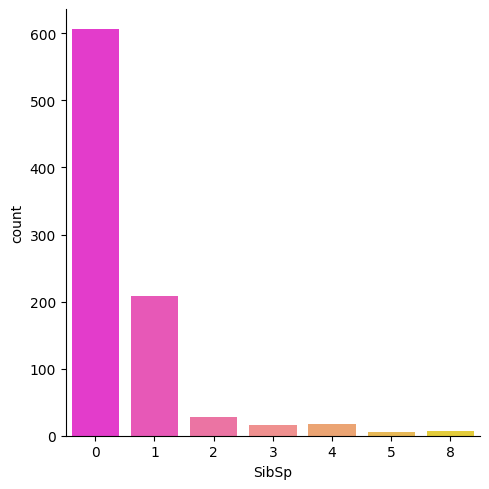

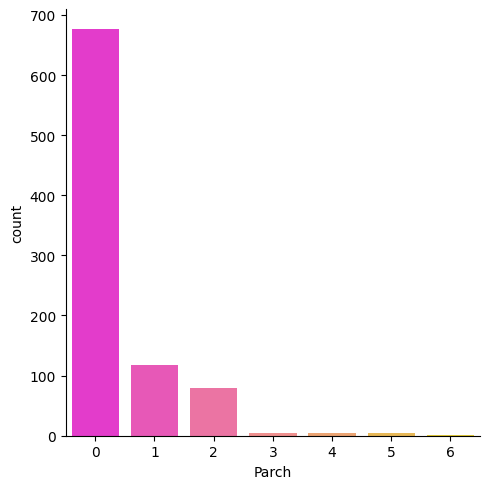

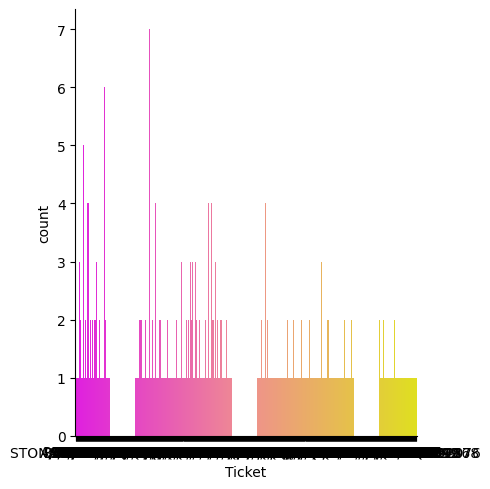

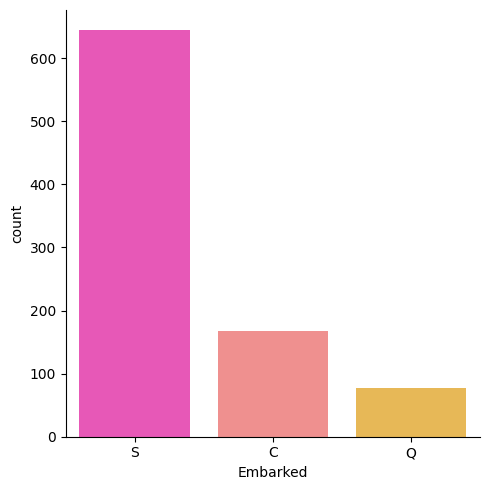

In [16]:
titanic_cat=titanic.drop(columns=['Age','Fare'])

for i in titanic_cat:
    sns.catplot(x=i,data=titanic_cat,kind='count',palette='spring')    
    plt.show

### Analysis the data in respect of Survived

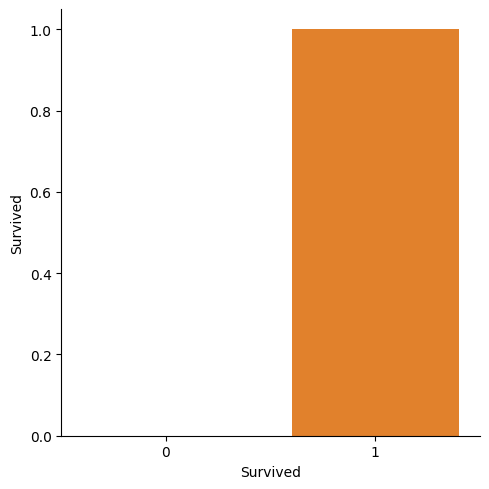

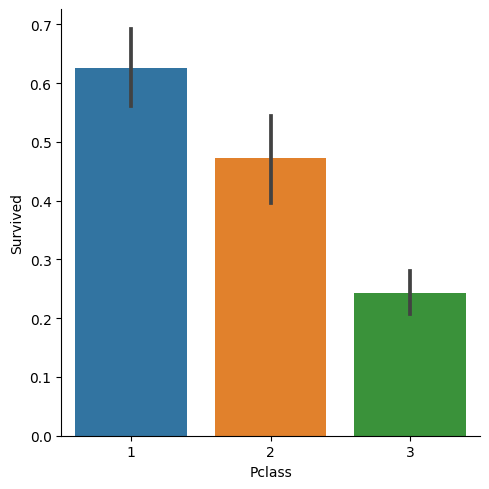

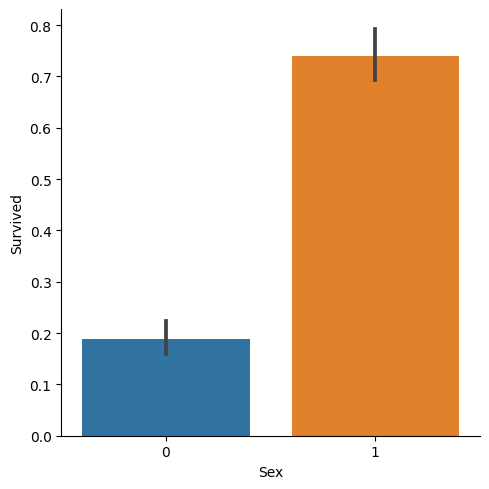

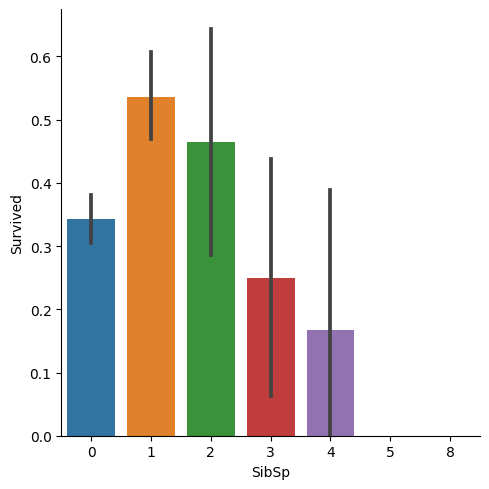

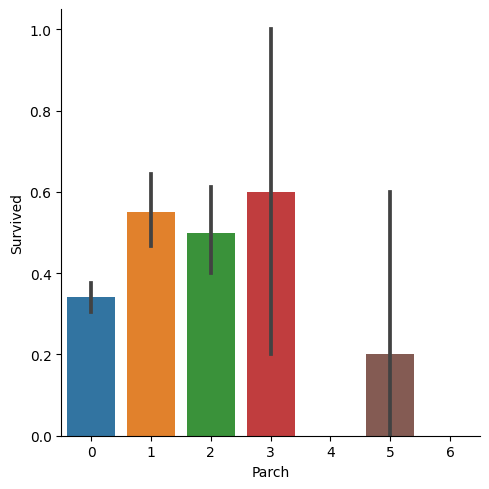

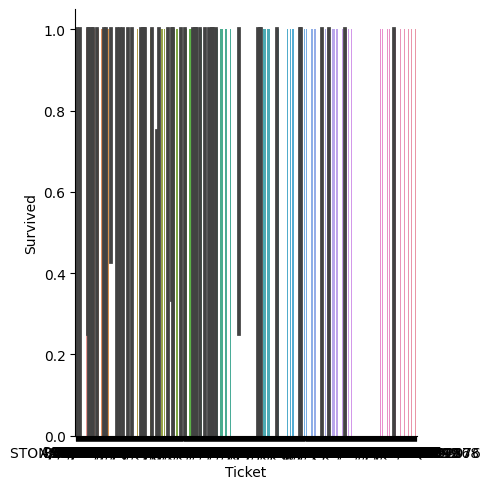

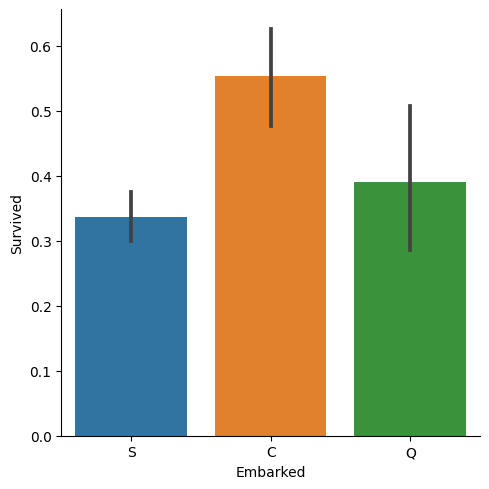

In [17]:
for column in titanic_cat:
    sns.catplot(data=titanic_cat,x=column,y='Survived',kind='bar')
    plt.show()

## We can get a impression about whats class or sex servived more during this incident but there is no clear output regaring the ticket 

## To under stand we have plotted a scatter plot

<AxesSubplot:xlabel='Survived', ylabel='Ticket'>

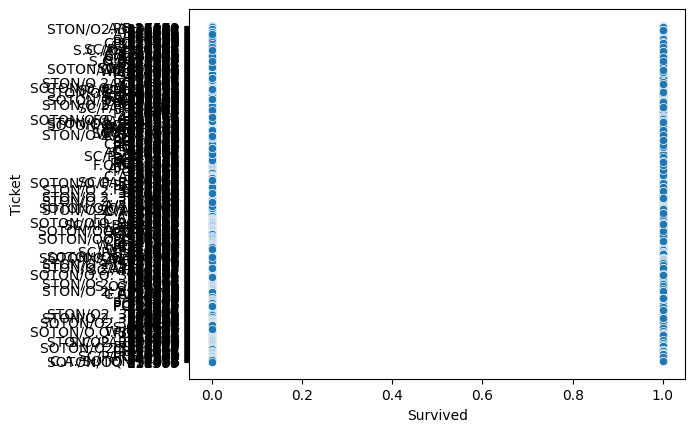

In [18]:
sns.scatterplot(data=titanic_cat,x='Survived',y='Ticket')

### Though it is a categorical data and not unique in nature, this plot shows this data has no perticular relation with "Survival" still we need more evidence.

In [19]:
oe=OrdinalEncoder()

In [20]:
titanic['Embarked']=oe.fit_transform(titanic['Embarked'].values.reshape(-1,1))
titanic['Ticket']=oe.fit_transform(titanic['Ticket'].values.reshape(-1,1))

In [21]:
titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,0,22.0,1,0,522.0,7.2500,2.0
1,1,1,1,38.0,1,0,595.0,71.2833,0.0
2,1,3,1,26.0,0,0,668.0,7.9250,2.0
3,1,1,1,35.0,1,0,48.0,53.1000,2.0
4,0,3,0,35.0,0,0,471.0,8.0500,2.0


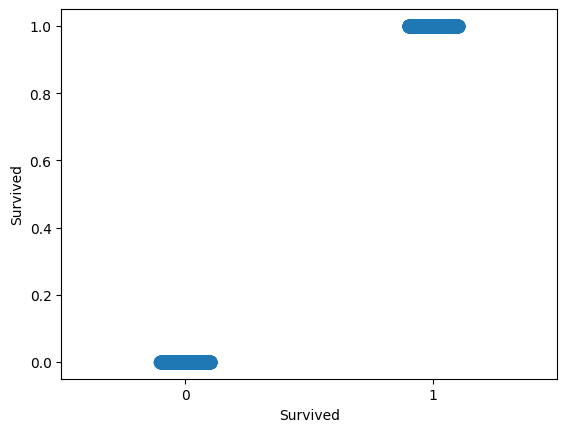

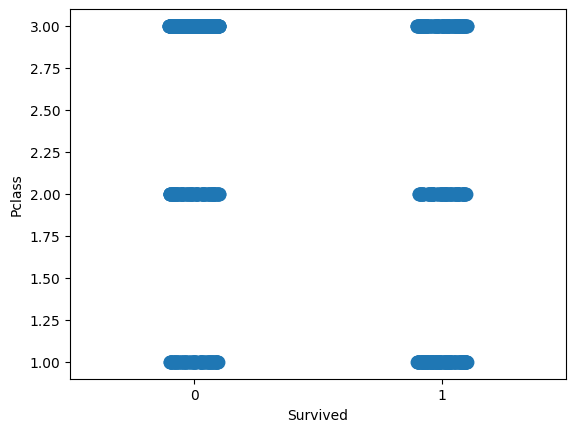

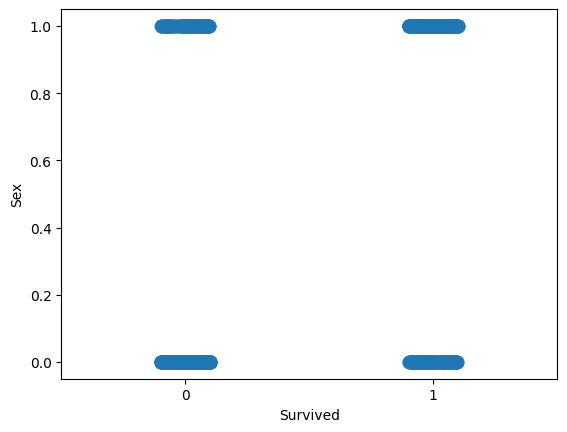

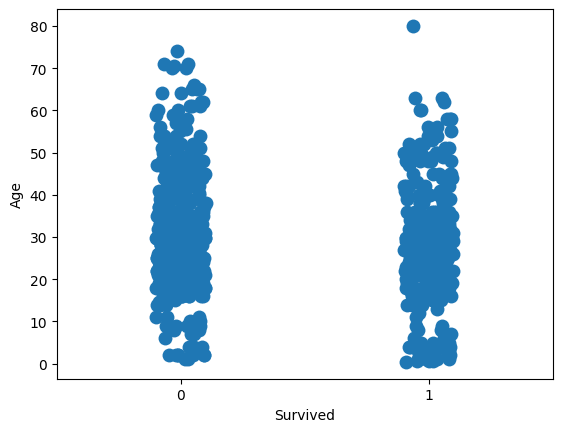

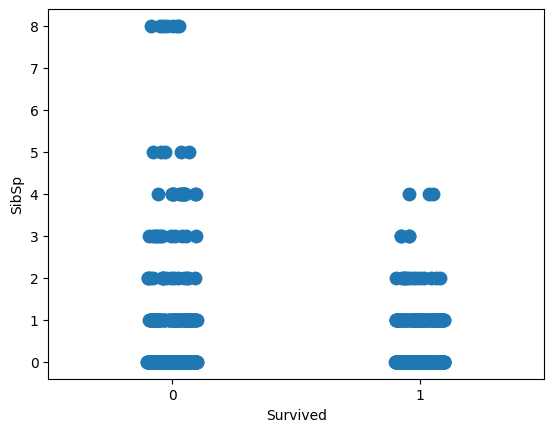

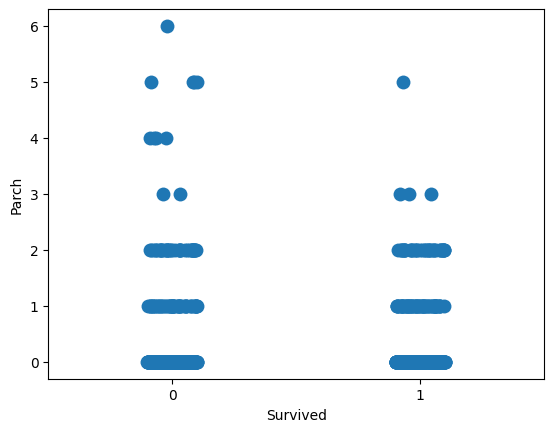

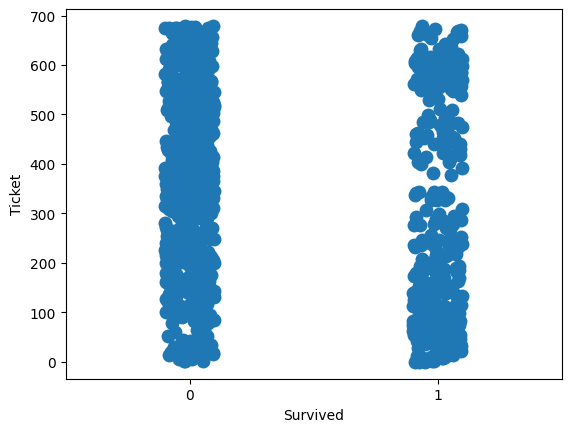

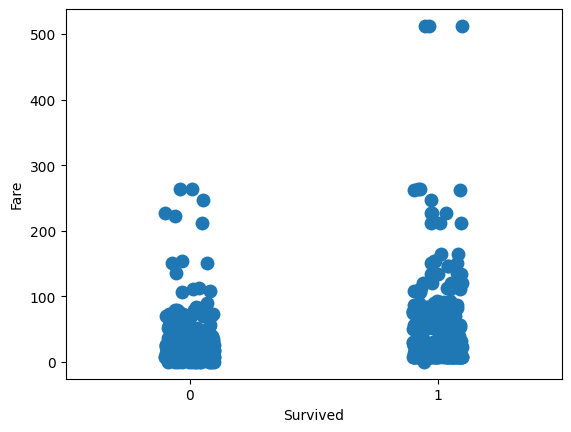

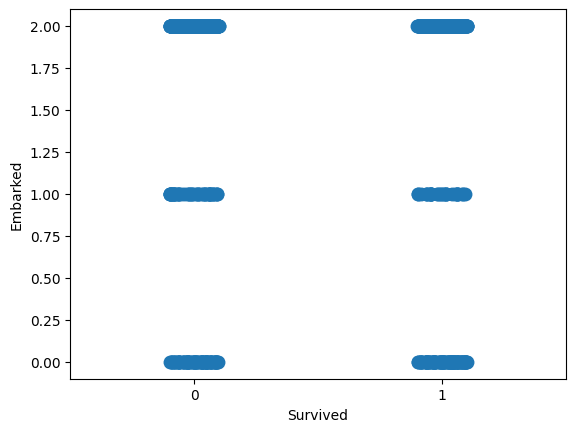

In [22]:
for column in titanic:
    sns.stripplot(data=titanic,x='Survived',y=column,size=10)
    plt.show()

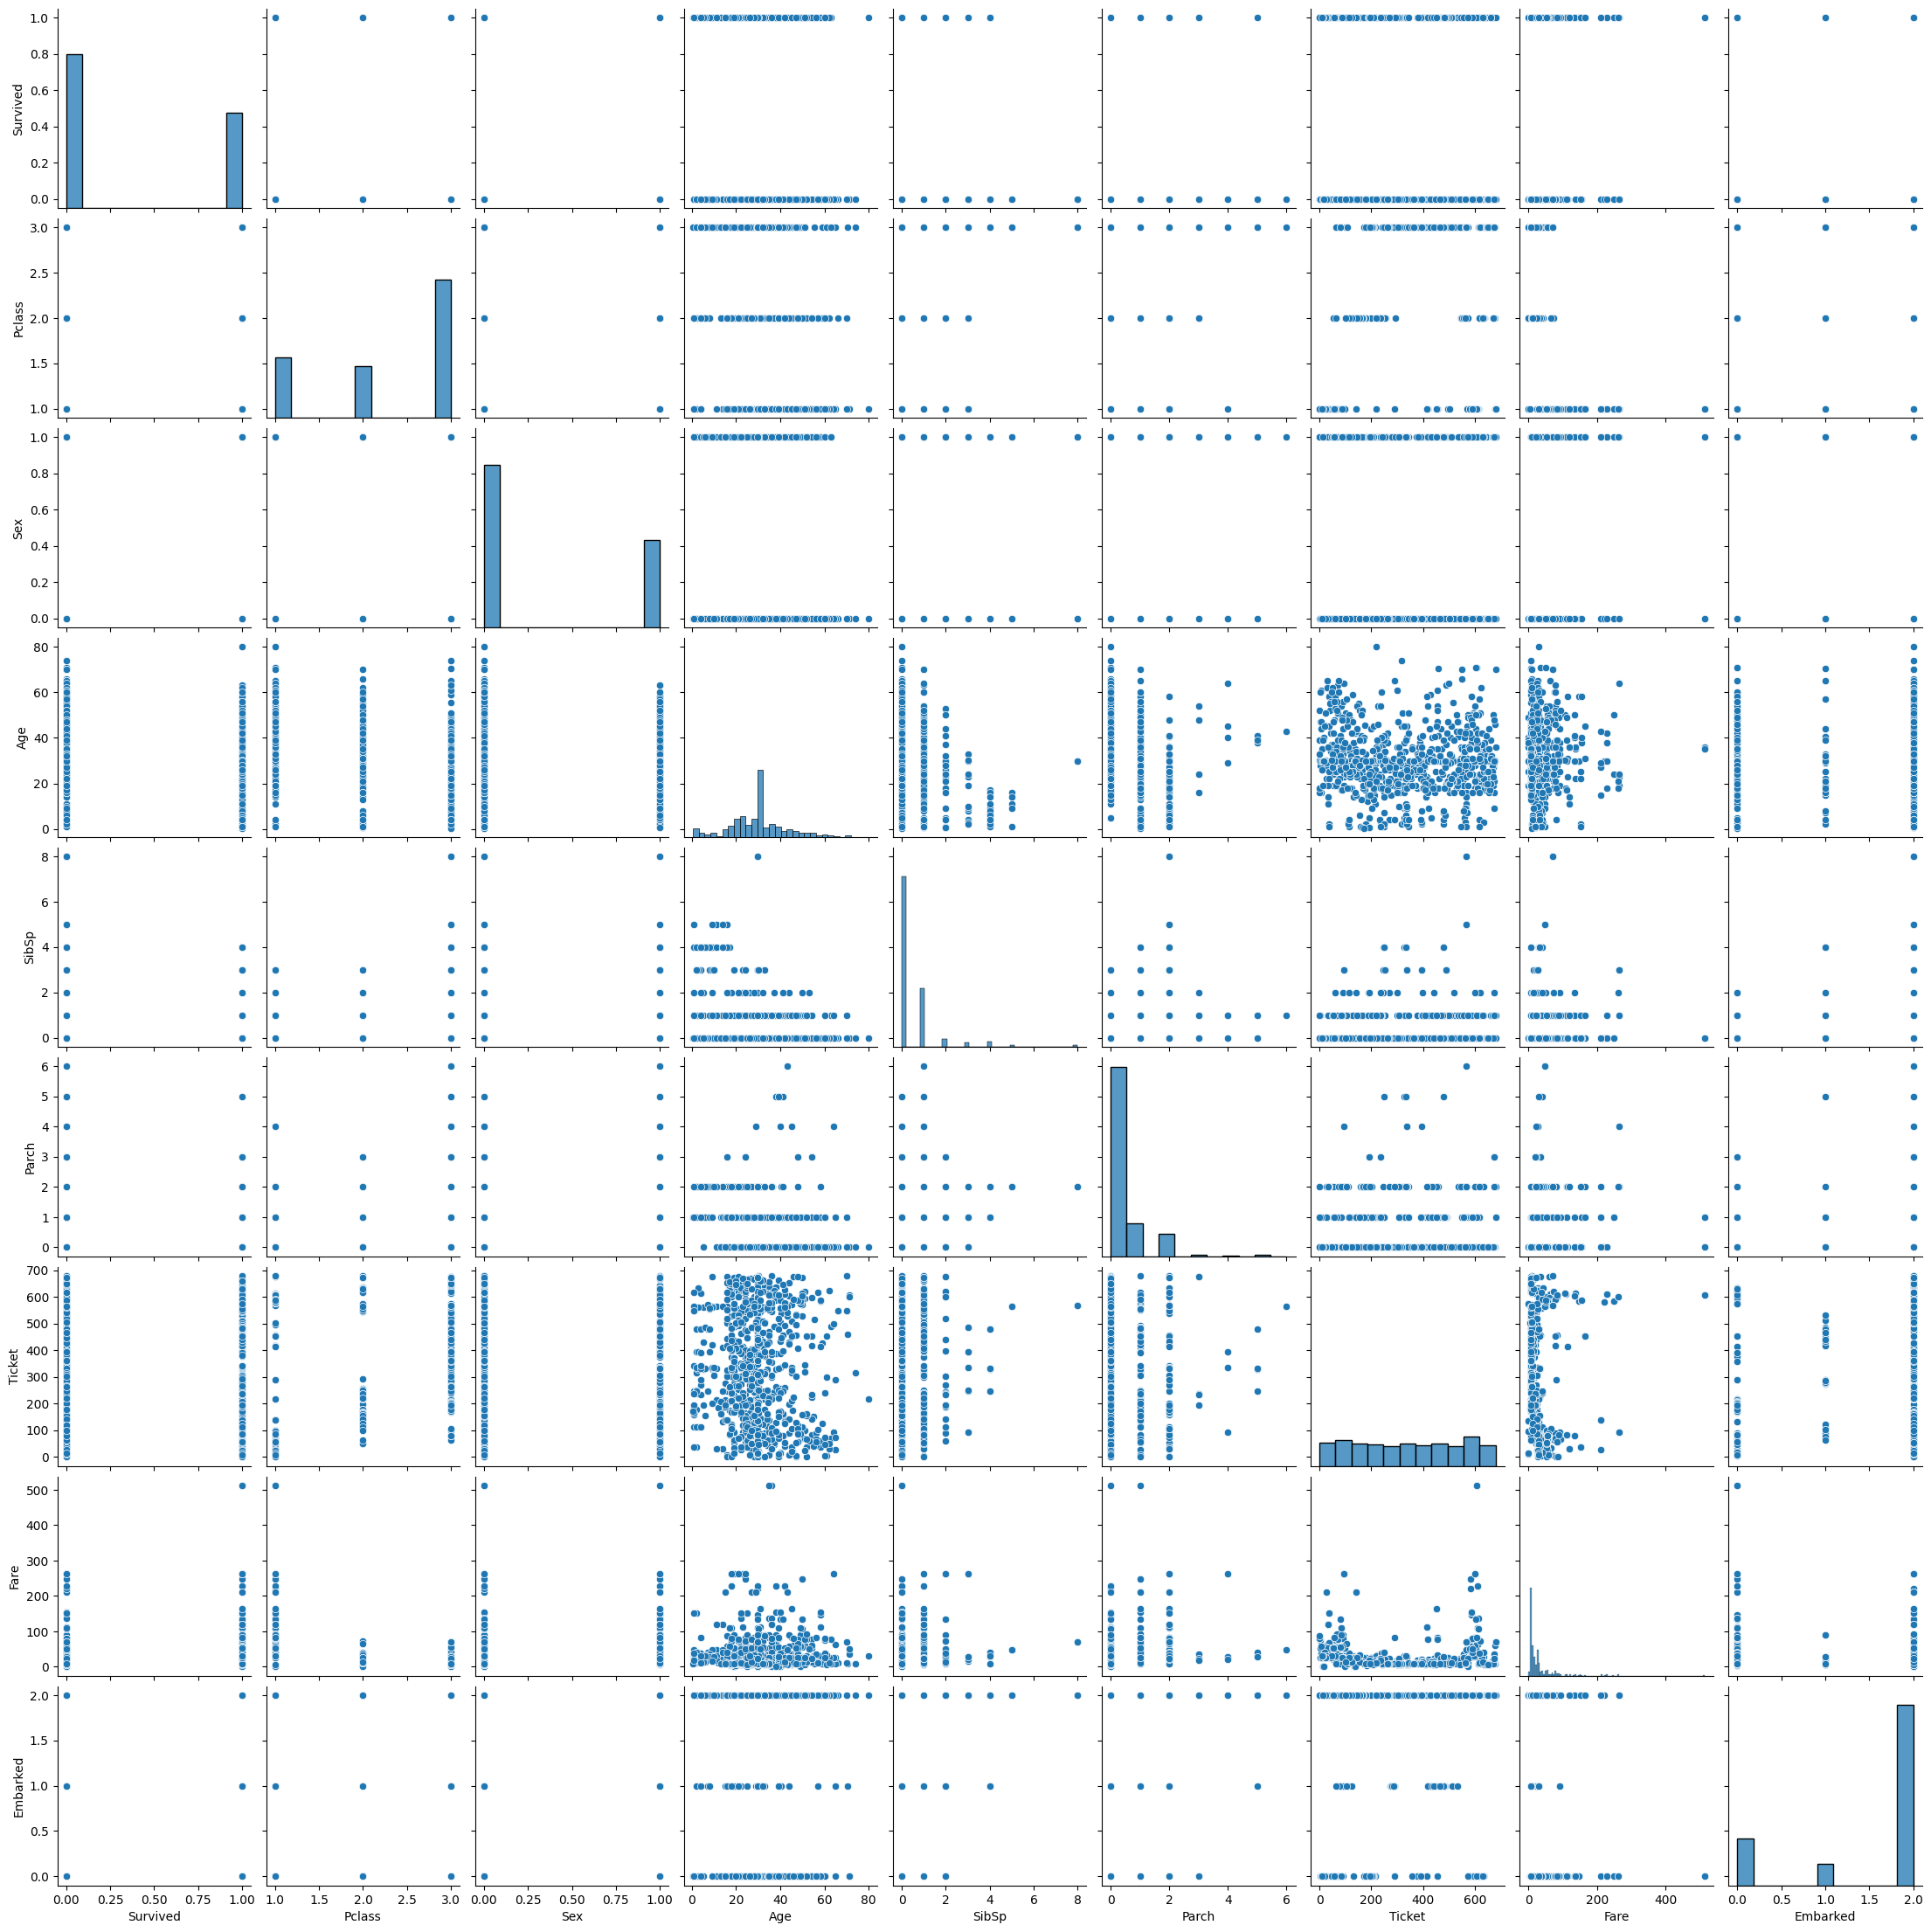

In [23]:
sns.pairplot(data=titanic)

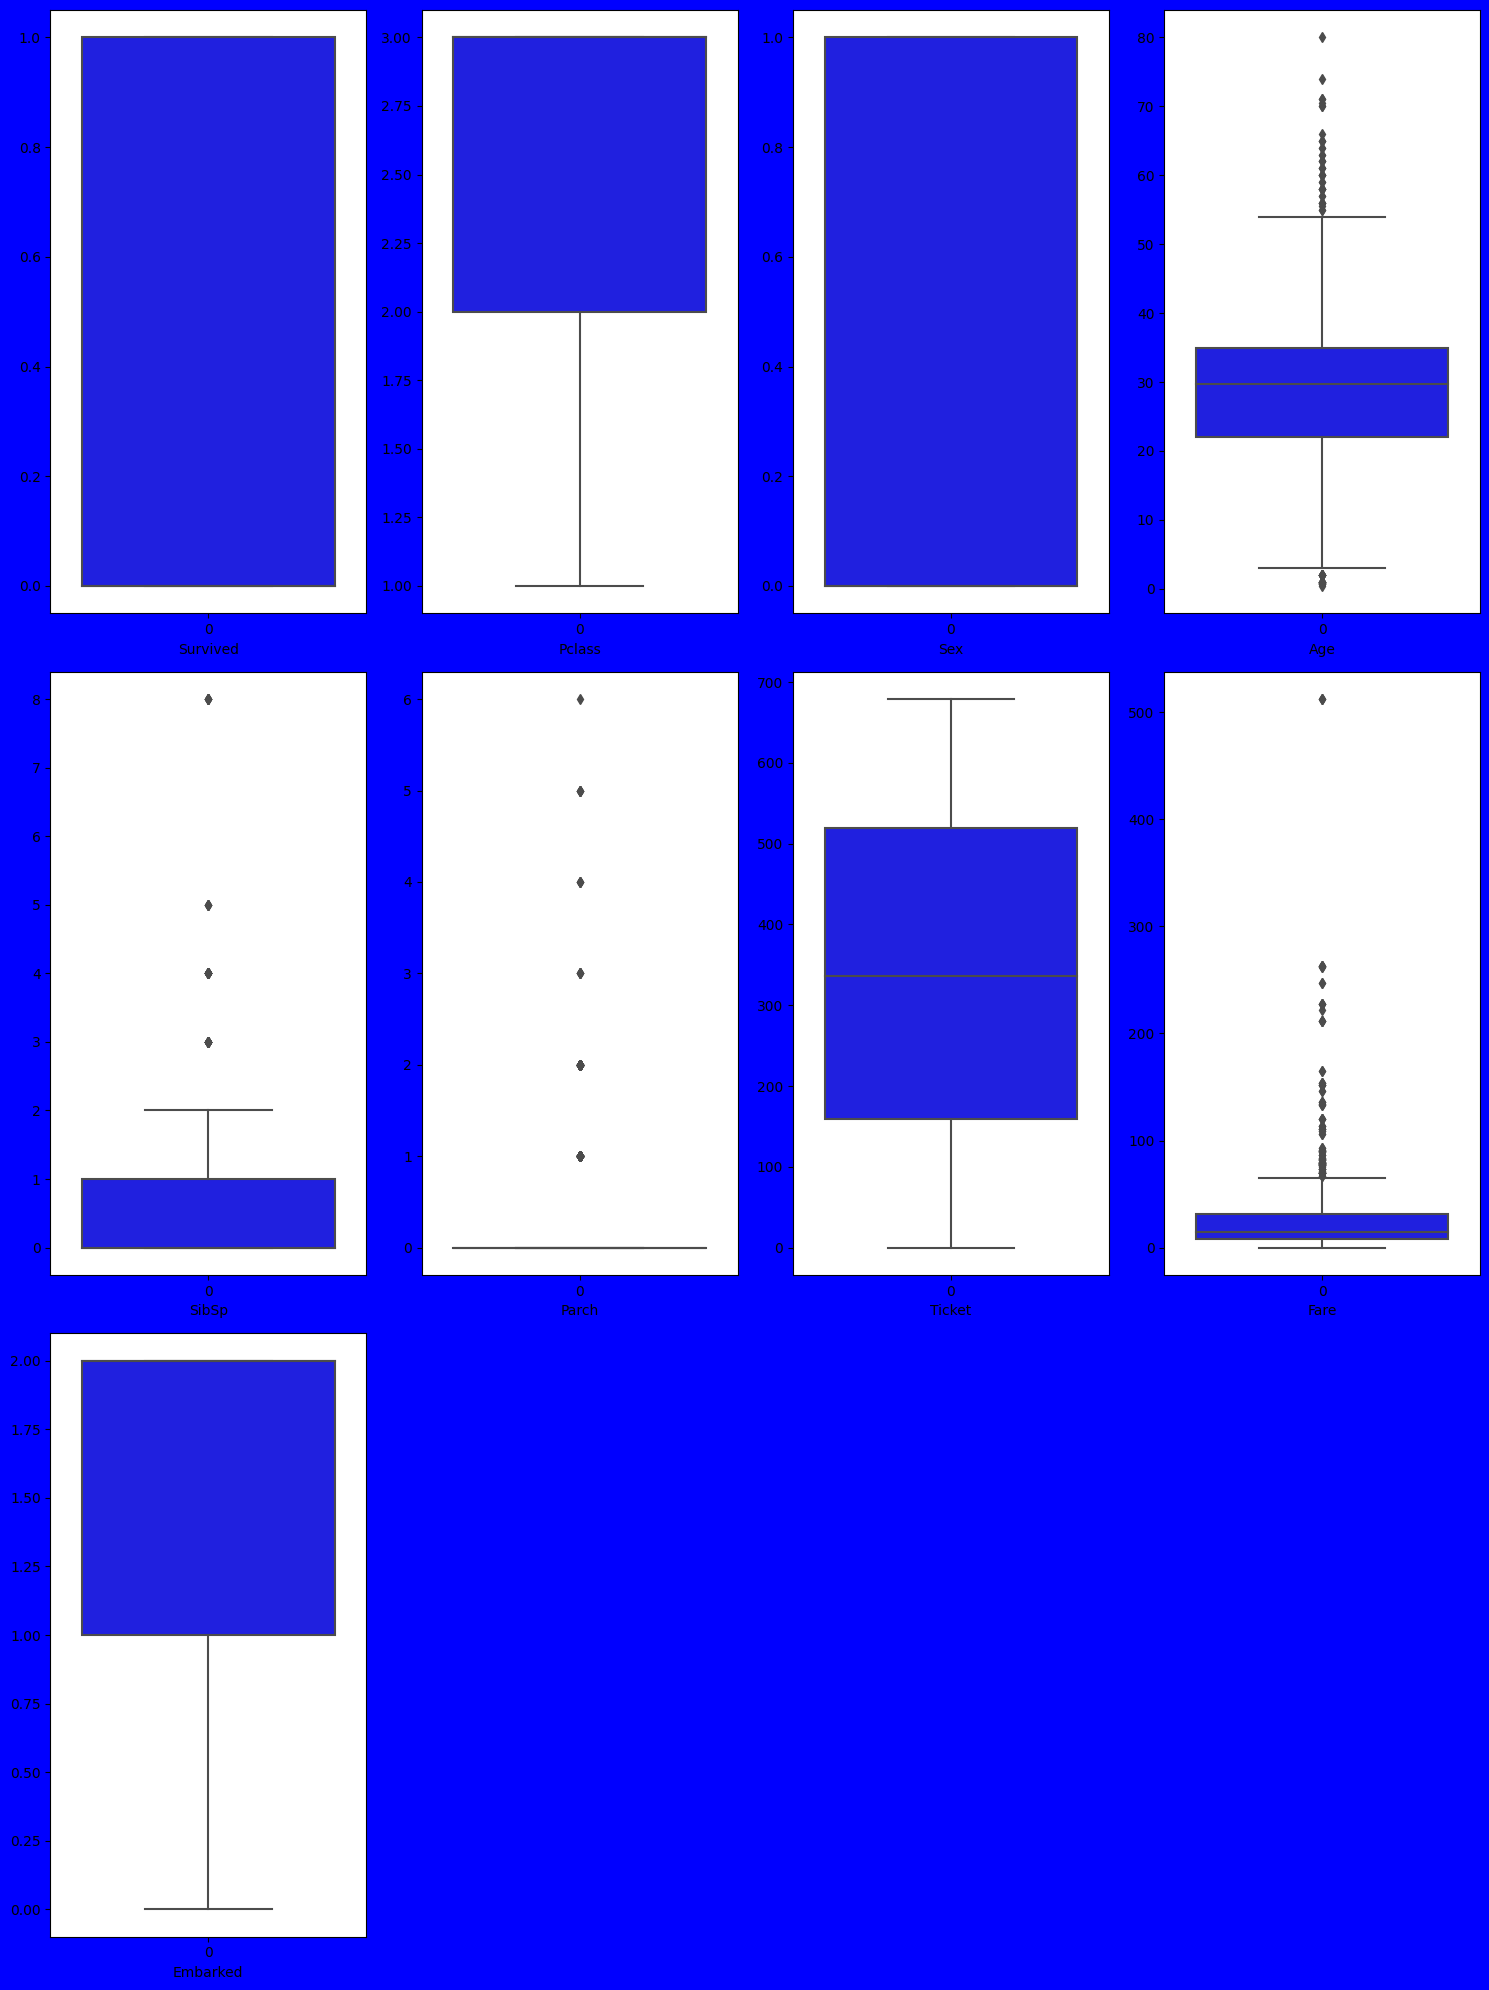

In [24]:
plt.figure(figsize=(15,20),facecolor='blue')
plotnumber=1
for column in titanic:
    plt.subplot(3,4,plotnumber)
    sns.boxplot(titanic[column],color='blue')
    plt.xlabel(column)
    plotnumber+=1
plt.tight_layout() 

### Fare, Sib Sp and Age is hsowing outlier (as sib sp is conisdered as a multi class type data we will deal with only 'Fare' and 'Age';)

### Analysis the Skewness of the data

In [25]:
titanic.skew()

Survived    0.484568
Pclass     -0.636998
Sex         0.625625
Age         0.431720
SibSp       3.691058
Parch       2.745160
Ticket     -0.000959
Fare        4.801440
Embarked   -1.261367
dtype: float64

## As all the out put is below 5.0 we can consider the data as less skewd 

## Dealing with outlier

In [26]:
columns=titanic.columns
out_lier=titanic[columns]
z=np.abs(zscore(out_lier))
## Removing outlier
titanic_z=titanic[(z<3).all(axis=1)]
print('## dataloss:')
print((titanic.shape[0]-titanic_z.shape[0])/(titanic.shape[0])*100)

## dataloss:
7.986501687289089


In [27]:
def remove_outlier(value,data):
    q3=data[value].quantile(0.75)
    q1=data[value].quantile(0.25)
    iqr=(q3-q1)
    value_high=(q3+1.5*iqr)
    value_low=(q1-1.5*iqr)
    h_index=np.where(data[value]>value_high)
    l_index=np.where(data[value]<value_low)
    data2=data.drop(data.index[l_index])
    data2.reset_index()
    data3=data2.drop(data.index[h_index])
    data3.reset_index()
    print(pd.DataFrame(data3))
    print('data_loss:',(data.shape[0]-data3.shape[0])/(data.shape[0])*100)
    
remove_outlier('Fare',data=titanic)

     Survived  Pclass  Sex        Age  SibSp  Parch  Ticket     Fare  Embarked
0           0       3    0  22.000000      1      0   522.0   7.2500       2.0
2           1       3    1  26.000000      0      0   668.0   7.9250       2.0
3           1       1    1  35.000000      1      0    48.0  53.1000       2.0
4           0       3    0  35.000000      0      0   471.0   8.0500       2.0
5           0       3    0  29.699118      0      0   274.0   8.4583       1.0
..        ...     ...  ...        ...    ...    ...     ...      ...       ...
886         0       2    0  27.000000      0      0   100.0  13.0000       2.0
887         1       1    1  19.000000      0      0    14.0  30.0000       2.0
888         0       3    1  29.699118      1      2   674.0  23.4500       2.0
889         1       1    0  26.000000      0      0     8.0  30.0000       0.0
890         0       3    0  32.000000      0      0   465.0   7.7500       1.0

[775 rows x 9 columns]
data_loss: 12.82339707536557

## From Above analysis we can see Z_score is giving us less loss of data so we considering 'titanic_z' as ML data set

### Analysis of data set and resolve if any diformation found

Survived    1.000000
Sex         0.553009
Fare        0.326829
Parch       0.202888
SibSp       0.096403
Age        -0.096638
Ticket     -0.155575
Embarked   -0.157142
Pclass     -0.319048
Name: Survived, dtype: float64


<AxesSubplot:>

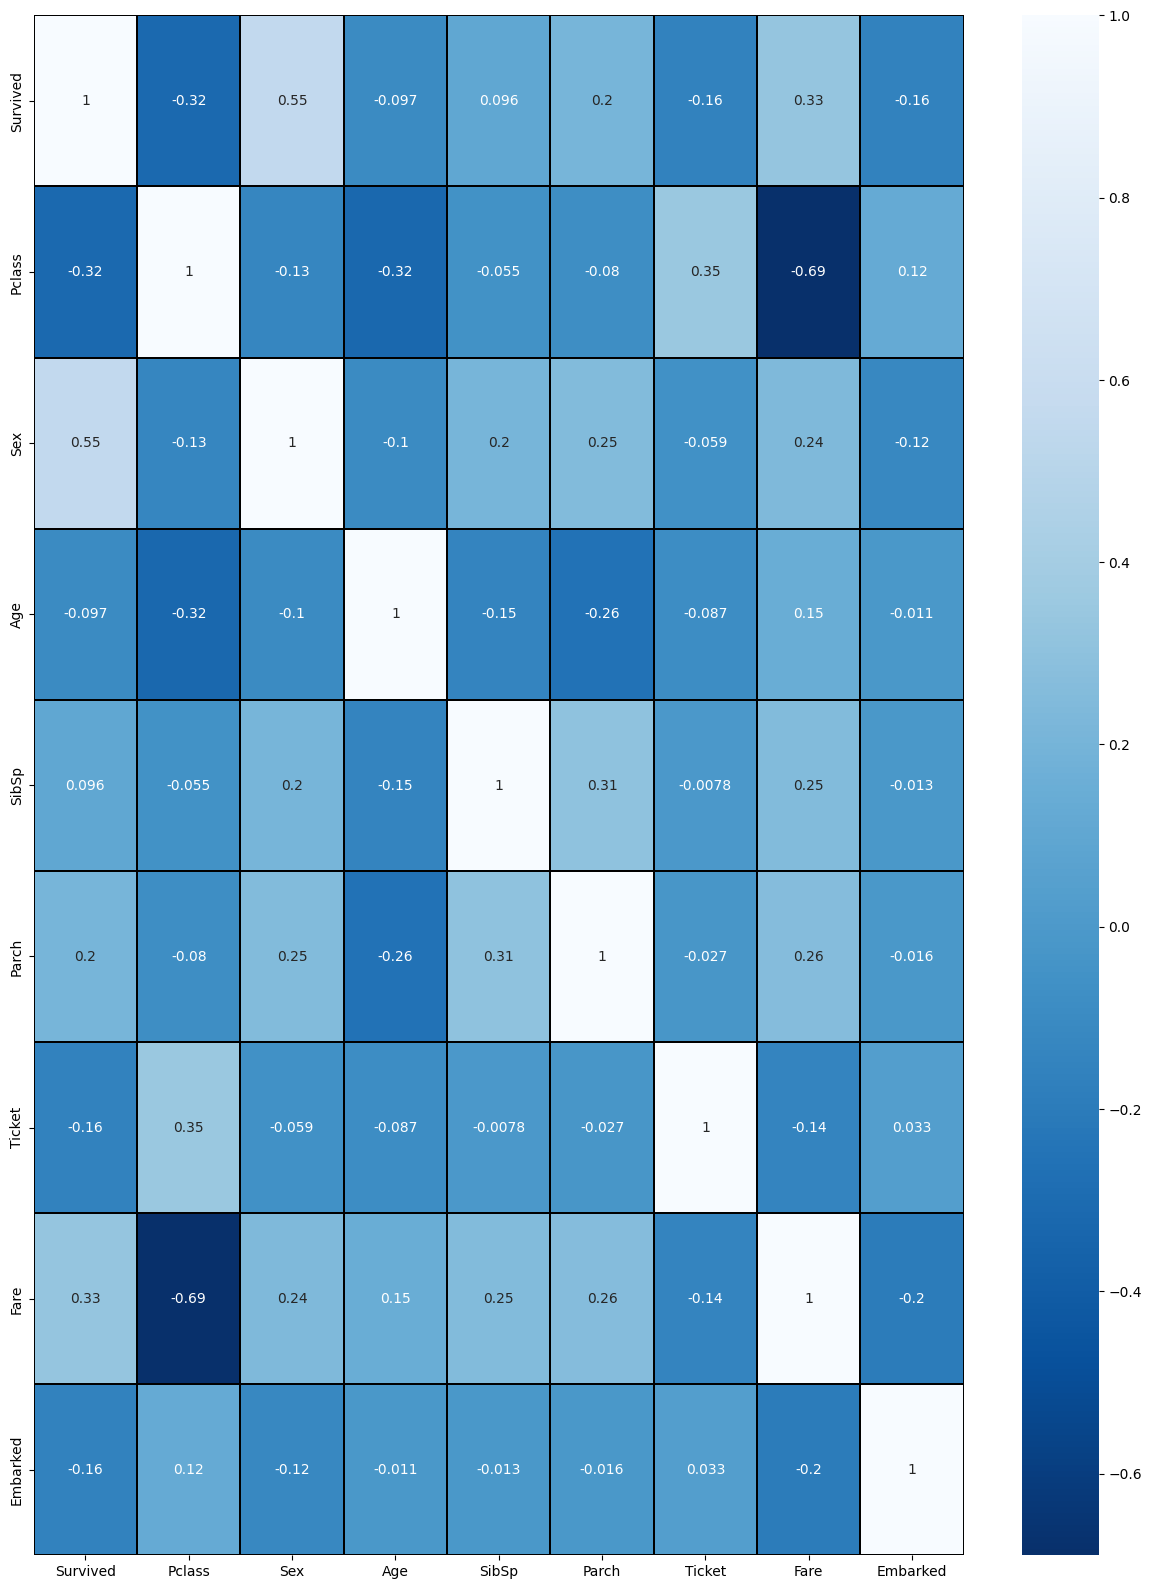

In [28]:
## Correlation:
cor=titanic_z.corr()
## relation with label and feature
print(cor['Survived'].sort_values(ascending=False))
## Plotting a heat map
plt.figure(figsize=(15,20))
sns.heatmap(titanic_z.corr(),cmap='Blues_r',fmt='0.2g',linecolor='black',annot=True,linewidths=0.1)

### As per corr value we are considering all the column for analysis

## feature and label selection, scaling & finding best fit combination within the range of 1000

In [29]:
x=titanic_z.drop(columns=['Survived'])
y=titanic_z['Survived']
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)

## Analysing VIF

In [30]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x,i)for i in range(x.shape[1])]
vif['feature']=x.columns
vif

,vif,feature
0,2.430562,Pclass
1,1.135006,Sex
2,1.248209,Age
3,1.187313,SibSp
4,1.279069,Parch
5,1.165868,Ticket
6,2.327625,Fare
7,1.051926,Embarked


## Data distribution of label and balancing the distribution with sampling technique

In [31]:
print('sample distribution before SMOTE:',y.value_counts())
sm=SMOTE()
x1,y1=sm.fit_resample(x,y)
print('**************************************************')
print('sample distribution after SMOTE:',y1.value_counts())

sample distribution before SMOTE: 0    500
1    318
Name: Survived, dtype: int64
**************************************************
sample distribution after SMOTE: 0    500
1    500
Name: Survived, dtype: int64


### As vif <5 for each column, we can say there is no ifluence of feautre over feature, we are considering all the column

In [32]:
max_accuracy=0
max_rs=0
for i in range (1000):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    regression_lr=LogisticRegression()
    regression_lr.fit(x_train,y_train)
    pred=regression_lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc > max_accuracy:
        max_accuracy=acc
        max_rs=i

print('Maximum accuracy:',max_accuracy, 'on random state:',max_rs)

Maximum accuracy: 0.8433333333333334 on random state: 832


In [33]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=max_rs)

In [34]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
score_LR=cross_val_score(LR,x_scaled,y)
print('Accuracy Score=',accuracy_score(y_test,pred_LR))
print('confusion metrics=',confusion_matrix(y_test,pred_LR))
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,pred_LR))
print('cross_val_score=',score_LR)
print('--------------------------------------------------------------------------------------')
print('avg value:',score_LR.mean())
print('--------------------------------------------------------------------------------------')
print('difference between accuracy and cv_score is::',accuracy_score(y_test,pred_LR)-score_LR.mean())

Accuracy Score= 0.8433333333333334
confusion metrics= [[124  17]
 [ 30 129]]
classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       141
           1       0.88      0.81      0.85       159

    accuracy                           0.84       300
   macro avg       0.84      0.85      0.84       300
weighted avg       0.85      0.84      0.84       300

cross_val_score= [0.78658537 0.77439024 0.7804878  0.80368098 0.80981595]
--------------------------------------------------------------------------------------
avg value: 0.7909920694298969
--------------------------------------------------------------------------------------
difference between accuracy and cv_score is:: 0.05234126390343652


In [35]:
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
pred_ETC=ETC.predict(x_test)
score_ETC=cross_val_score(ETC,x_scaled,y)
print('Accuracy Score=',accuracy_score(y_test,pred_ETC))
print('confusion metrics=',confusion_matrix(y_test,pred_ETC))
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,pred_ETC))
print('cross_val_score=',score_ETC)
print('--------------------------------------------------------------------------------------')
print('avg value:',score_ETC.mean())
print('--------------------------------------------------------------------------------------')
print('difference between accuracy and cv_score is::',accuracy_score(y_test,pred_ETC)-score_ETC.mean())

Accuracy Score= 0.8566666666666667
confusion metrics= [[123  18]
 [ 25 134]]
classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       141
           1       0.88      0.84      0.86       159

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300

cross_val_score= [0.75609756 0.79268293 0.81707317 0.80368098 0.83435583]
--------------------------------------------------------------------------------------
avg value: 0.8007780936705071
--------------------------------------------------------------------------------------
difference between accuracy and cv_score is:: 0.05588857299615957


In [36]:
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
pred_DT=DT.predict(x_test)
score_DT=cross_val_score(DT,x1,y1)
print('Accuracy Score=',accuracy_score(y_test,pred_DT))
print('confusion metrics=',confusion_matrix(y_test,pred_DT))
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,pred_DT))
print('cross_val_score=',score_DT)
print('--------------------------------------------------------------------------------------')
print('avg value:',score_DT.mean())
print('--------------------------------------------------------------------------------------')
print('difference between accuracy and cv_score is::',accuracy_score(y_test,pred_DT)-score_DT.mean())

Accuracy Score= 0.8166666666666667
confusion metrics= [[119  22]
 [ 33 126]]
classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       141
           1       0.85      0.79      0.82       159

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300

cross_val_score= [0.74  0.805 0.8   0.835 0.845]
--------------------------------------------------------------------------------------
avg value: 0.8049999999999999
--------------------------------------------------------------------------------------
difference between accuracy and cv_score is:: 0.011666666666666714


In [37]:
KNC=KNeighborsClassifier()
KNC.fit(x_train,y_train)
pred_KNC=KNC.predict(x_test)
score_KNC=cross_val_score(KNC,x1,y1)
print('Accuracy Score=',accuracy_score(y_test,pred_KNC))
print('confusion metrics=',confusion_matrix(y_test,pred_KNC))
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,pred_KNC))
print('cross_val_score=',score_KNC)
print('--------------------------------------------------------------------------------------')
print('avg value:',score_KNC.mean())
print('--------------------------------------------------------------------------------------')
print('difference between accuracy and cv_score is::',accuracy_score(y_test,pred_KNC)-score_KNC.mean())

Accuracy Score= 0.83
confusion metrics= [[120  21]
 [ 30 129]]
classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       141
           1       0.86      0.81      0.83       159

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

cross_val_score= [0.775 0.78  0.775 0.84  0.785]
--------------------------------------------------------------------------------------
avg value: 0.791
--------------------------------------------------------------------------------------
difference between accuracy and cv_score is:: 0.038999999999999924


In [38]:
ADB=AdaBoostClassifier()
ADB.fit(x_train,y_train)
pred_ADB=ETC.predict(x_test)
score_ADB=cross_val_score(ADB,x1,y1)
print('Accuracy Score=',accuracy_score(y_test,pred_ADB))
print('confusion metrics=',confusion_matrix(y_test,pred_ADB))
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,pred_ADB))
print('cross_val_score=',score_ADB)
print('--------------------------------------------------------------------------------------')
print('avg value:',score_ADB.mean())
print('--------------------------------------------------------------------------------------')
print('difference between accuracy and cv_score is::',accuracy_score(y_test,pred_ADB)-score_ADB.mean())

Accuracy Score= 0.8566666666666667
confusion metrics= [[123  18]
 [ 25 134]]
classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       141
           1       0.88      0.84      0.86       159

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300

cross_val_score= [0.74  0.785 0.795 0.815 0.82 ]
--------------------------------------------------------------------------------------
avg value: 0.7909999999999999
--------------------------------------------------------------------------------------
difference between accuracy and cv_score is:: 0.06566666666666676


In [39]:
GDB=GradientBoostingClassifier()
GDB.fit(x_train,y_train)
pred_GDB=ETC.predict(x_test)
score_gdb=cross_val_score(GDB,x1,y1)
print('Accuracy Score=',accuracy_score(y_test,pred_GDB))
print('confusion metrics=',confusion_matrix(y_test,pred_GDB))
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,pred_GDB))
print('cross_val_score=',score_gdb)
print('--------------------------------------------------------------------------------------')
print('avg value:',score_gdb.mean())
print('--------------------------------------------------------------------------------------')
print('difference between accuracy and cv_score is::',accuracy_score(y_test,pred_GDB)-score_gdb.mean())

Accuracy Score= 0.8566666666666667
confusion metrics= [[123  18]
 [ 25 134]]
classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       141
           1       0.88      0.84      0.86       159

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300

cross_val_score= [0.79  0.825 0.8   0.86  0.835]
--------------------------------------------------------------------------------------
avg value: 0.8219999999999998
--------------------------------------------------------------------------------------
difference between accuracy and cv_score is:: 0.034666666666666845


In [40]:
GPC=GaussianProcessClassifier()
GPC.fit(x_train,y_train)
pred_gpc=GPC.predict(x_test)
score_gpc=cross_val_score(GPC,x1,y1)
print('Accuracy Score=',accuracy_score(y_test,pred_gpc))
print('confusion metrics=',confusion_matrix(y_test,pred_gpc))
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,pred_gpc))
print('cross_val_score=',score_gpc)
print('--------------------------------------------------------------------------------------')
print('avg value:',score_gpc.mean())
print('--------------------------------------------------------------------------------------')
print('difference between accuracy and cv_score is::',accuracy_score(y_test,pred_gpc)-score_gpc.mean())

Accuracy Score= 0.8366666666666667
confusion metrics= [[125  16]
 [ 33 126]]
classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       141
           1       0.89      0.79      0.84       159

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

cross_val_score= [0.775 0.805 0.8   0.85  0.84 ]
--------------------------------------------------------------------------------------
avg value: 0.8140000000000001
--------------------------------------------------------------------------------------
difference between accuracy and cv_score is:: 0.022666666666666613


In [41]:
SVC=SVC()
SVC.fit(x_train,y_train)
pred_svc=SVC.predict(x_test)
score_svc=cross_val_score(SVC,x1,y1)
print('Accuracy Score=',accuracy_score(y_test,pred_svc))
print('confusion metrics=',confusion_matrix(y_test,pred_svc))
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,pred_svc))
print('cross_val_score=',score_svc)
print('--------------------------------------------------------------------------------------')
print('avg value:',score_svc.mean())
print('--------------------------------------------------------------------------------------')
print('difference between accuracy and cv_score is::',accuracy_score(y_test,pred_svc)-score_svc.mean())

Accuracy Score= 0.8533333333333334
confusion metrics= [[124  17]
 [ 27 132]]
classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       141
           1       0.89      0.83      0.86       159

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.86      0.85      0.85       300

cross_val_score= [0.8   0.81  0.785 0.845 0.825]
--------------------------------------------------------------------------------------
avg value: 0.8130000000000001
--------------------------------------------------------------------------------------
difference between accuracy and cv_score is:: 0.04033333333333333


In [42]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)
pred_BC=BC.predict(x_test)
score_bc=cross_val_score(BC,x1,y1)
print('Accuracy Score=',accuracy_score(y_test,pred_BC))
print('confusion metrics=',confusion_matrix(y_test,pred_BC))
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,pred_BC))
print('cross_val_score=',score_bc)
print('--------------------------------------------------------------------------------------')
print('avg value:',score_bc.mean())
print('--------------------------------------------------------------------------------------')
print('difference between accuracy and cv_score is::',accuracy_score(y_test,pred_BC)-score_bc.mean())

Accuracy Score= 0.83
confusion metrics= [[124  17]
 [ 34 125]]
classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       141
           1       0.88      0.79      0.83       159

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.84      0.83      0.83       300

cross_val_score= [0.76  0.815 0.84  0.875 0.89 ]
--------------------------------------------------------------------------------------
avg value: 0.836
--------------------------------------------------------------------------------------
difference between accuracy and cv_score is:: -0.006000000000000005


In [43]:
from sklearn.model_selection import GridSearchCV

param_grid=[]
p=GridSearchCV.get_params(GDB,deep=True)
param_grid.append(p)

print(param_grid)

[{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}]


In [44]:
p1={'criterion': ['friedman_mse'], 'learning_rate': [0.1], 'loss':['deviance'], 'max_depth': [3], 'min_samples_leaf': [1], 'min_samples_split': [2],'n_estimators': [100], 'subsample': [1.0], 'tol': [0.0001], 'validation_fraction': [0.1],'warm_start':[ False]}

GCV=GridSearchCV(GradientBoostingClassifier(),param_grid=p1,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse'], 'learning_rate': [0.1],
                         'loss': ['deviance'], 'max_depth': [3],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [100], 'subsample': [1.0],
                         'tol': [0.0001], 'validation_fraction': [0.1],
                         'warm_start': [False]})

In [45]:
p_best=GCV.best_params_
print(p_best)

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'warm_start': False}


In [46]:
final_model=GradientBoostingClassifier(
criterion= 'friedman_mse', 
learning_rate= 0.1, 
loss= 'deviance', 
max_depth= 3, min_samples_leaf= 1, 
min_samples_split= 2, n_estimators= 100, 
subsample= 1.0, tol= 0.0001, validation_fraction= 0.1, 
warm_start= False)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

82.0


In [47]:
from sklearn import metrics
from sklearn import datasets
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

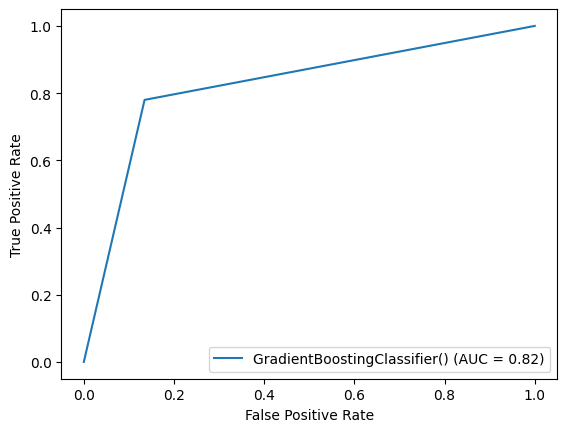

In [48]:
fpr,tpr,thresolds=metrics.roc_curve(y_test,pred,pos_label=1)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(tpr=tpr,fpr=fpr,roc_auc=roc_auc,estimator_name=final_model)
display.plot()

In [49]:
file_name='TITANIC.pkl'
pickle.dump(final_model,open(file_name,'wb'))